In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
fashion_train_df = pd.read_csv('./fashion_data/fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('./fashion_data/fashion-mnist_test.csv')

In [11]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
fashion_train_df.shape

(60000, 785)

In [13]:
training = np.array(fashion_train_df,dtype='float32')

In [14]:
testing = np.array(fashion_test_df,dtype='float32')

10 Classes:
0 - Tshirt/Top
1 - Trouser
2 - Pullover
3 - Dress
4 - Coat
5 - Sandle
6 - Shirt
7 - Sneaker
8 - Bag
9 - Ankle Boot


5.0


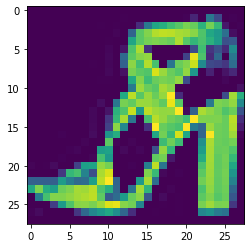

In [15]:
import random
i=random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
print(label)

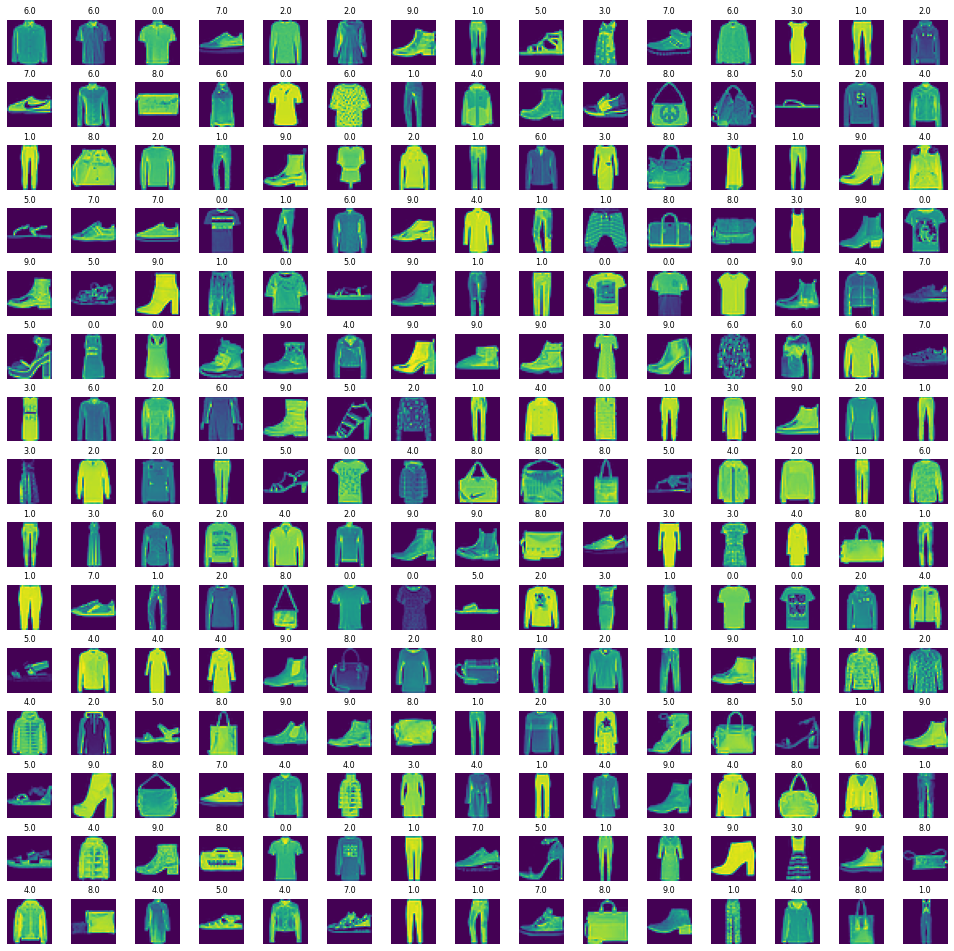

In [16]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid,W_grid,figsize=(17,17))
axes=axes.ravel()
n_training=len(training)
for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0],fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [17]:
X_train=training[:,1:]/255
y_train=training[:,0]
X_test=testing[:,1:]/255
y_test=testing[:,0]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [20]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation='relu'))
cnn_model.add(Dense(10,activation='sigmoid'))

In [23]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

C:\Users\abish\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [24]:
epochs = 50

In [25]:
cnn_model.fit(X_train,
             y_train,
             batch_size=512,
             epochs = epochs,
             verbose=1,
             validation_data=(X_validate,y_validate))

Epoch 1/50
94/94 [==============================] - 12s 13ms/step - loss: 1.8104 - accuracy: 0.4163 - val_loss: 0.7481 - val_accuracy: 0.7362
Epoch 2/50
94/94 [==============================] - 1s 7ms/step - loss: 0.7041 - accuracy: 0.7490 - val_loss: 0.6030 - val_accuracy: 0.7828
Epoch 3/50
94/94 [==============================] - 1s 7ms/step - loss: 0.6003 - accuracy: 0.7850 - val_loss: 0.5564 - val_accuracy: 0.7956
Epoch 4/50
94/94 [==============================] - 1s 7ms/step - loss: 0.5492 - accuracy: 0.8053 - val_loss: 0.5206 - val_accuracy: 0.8142
Epoch 5/50
94/94 [==============================] - 1s 7ms/step - loss: 0.5203 - accuracy: 0.8115 - val_loss: 0.4935 - val_accuracy: 0.8230
Epoch 6/50
94/94 [==============================] - 1s 9ms/step - loss: 0.4989 - accuracy: 0.8217 - val_loss: 0.4744 - val_accuracy: 0.8280
Epoch 7/50
94/94 [==============================] - 1s 9ms/step - loss: 0.4784 - accuracy: 0.8297 - val_loss: 0.4613 - val_accuracy: 0.8314
Epoch 8/50
94/94 [

In [27]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 0s 789us/step - loss: 0.3459 - accuracy: 0.8702
Test Accuracy : 0.870


In [28]:
predicted_classes = cnn_model.predict_classes(X_test)

C:\Users\abish\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

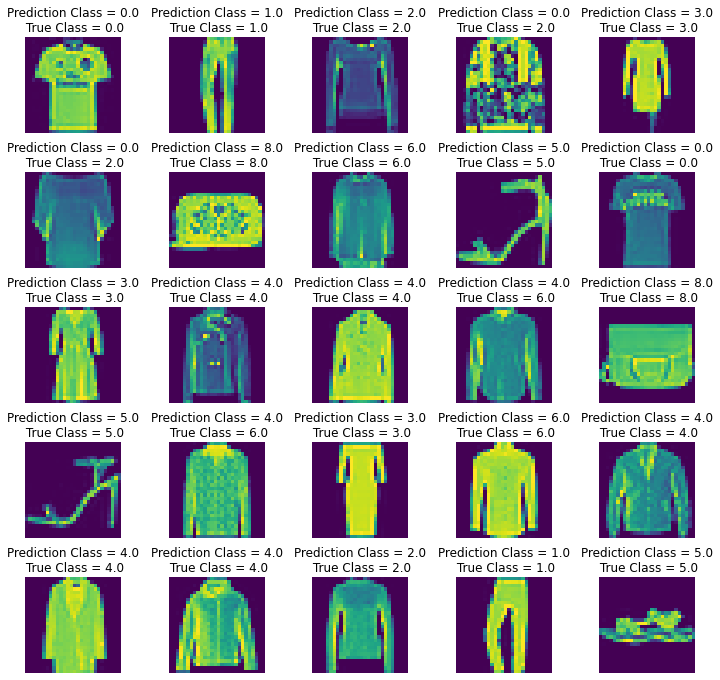

In [31]:
L = 5
W = 5
fig, axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

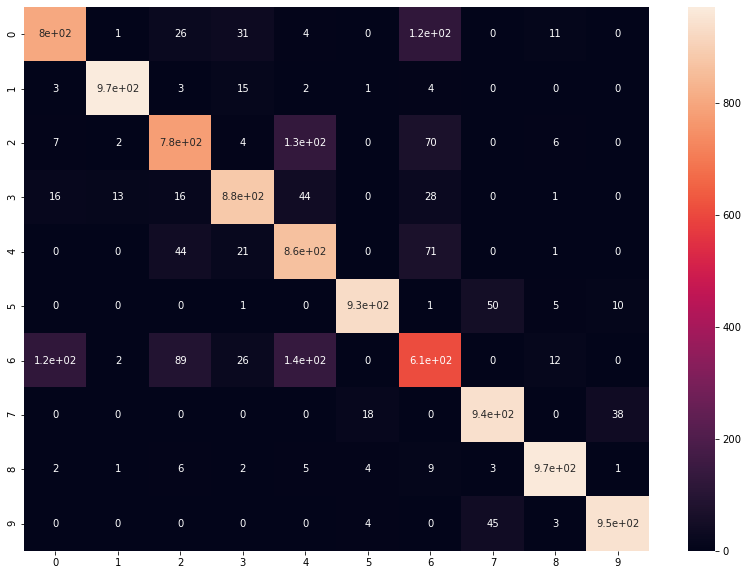

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)
#samples classified correctly along the diagonal

In [33]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test,predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.80      0.82      1000
     Class 1       0.98      0.97      0.98      1000
     Class 2       0.81      0.78      0.79      1000
     Class 3       0.90      0.88      0.89      1000
     Class 4       0.73      0.86      0.79      1000
     Class 5       0.97      0.93      0.95      1000
     Class 6       0.67      0.61      0.64      1000
     Class 7       0.91      0.94      0.92      1000
     Class 8       0.96      0.97      0.96      1000
     Class 9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

